In [2]:
%matplotlib inline
import pandas as pd
import numpy as np

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.read_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Gigantic,2018
1,Lawson: White Heat,2009
2,The Purge: Anarchy,2014
3,Sawar Re,2008
4,Mockery,1927


In [5]:
cast = pd.read_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


### What are the ten most common movie names of all time?

In [6]:
titles.title.value_counts().head(10)

Hamlet                  19
Macbeth                 15
Carmen                  15
The Outsider            11
The Three Musketeers    11
Hero                    11
Othello                 11
Maya                    11
Freedom                 10
Anna Karenina           10
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [7]:
td = titles[titles.year // 10 == 193]
td.year.value_counts().head(3)

1937    1190
1936    1133
1938    1127
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

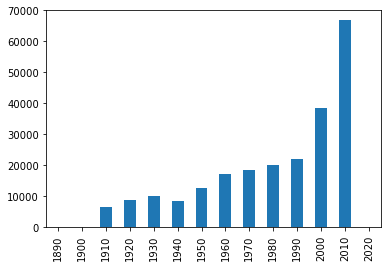

In [8]:
(titles.year // 10*10).value_counts().sort_index().plot(kind = 'bar')

### Plot the number of "Hamlet" films made each decade.

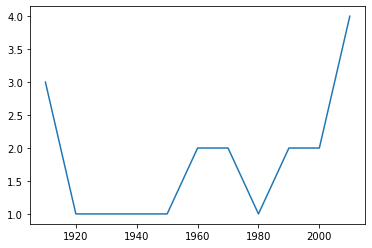

In [9]:
td2=titles[titles.title == 'Hamlet']
(td2.year // 10 * 10).value_counts().sort_index().plot()

### Plot the number of "Rustler" characters in each decade of the history of film.

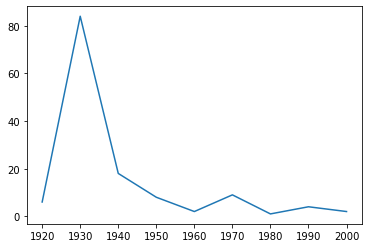

In [10]:
cd = cast[cast.character == 'Rustler']
(cd.year // 10 * 10).value_counts().sort_index().plot()

### Plot the number of "Hamlet" characters each decade.

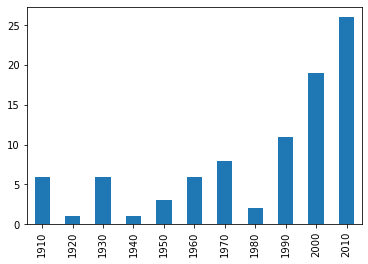

In [11]:
cd2 = cast[cast.character == 'Hamlet']
(cd2.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### What are the 11 most common character names in movie history?

In [12]:
cast.character.value_counts().head(11)

Himself        19468
Dancer         11855
Extra          10648
Reporter        8041
Doctor          7312
Student         6920
Policeman       6800
Party Guest     6626
Nurse           6523
Bartender       6498
Minor Role      6170
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [13]:
cast[cast.character == 'Herself'].name.value_counts().head(10)

Joyce Brothers        14
Queen Elizabeth II    11
Mary Jo Pehl           7
Margaret Thatcher      7
Joan Rivers            6
Caroline Rhea          5
Marilyn Monroe         5
Hillary Clinton        5
Bunny Yeager           5
Kareena Kapoor         5
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [14]:
cast[cast.character == 'Himself'].name.value_counts().head(10)

Adolf Hitler             98
Richard Nixon            43
Ronald Reagan            36
John F. Kennedy          28
Ron Jeremy               23
Winston Churchill        22
Benito Mussolini         22
George W. Bush           22
Franklin D. Roosevelt    20
Bill Clinton             20
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [15]:
cast[cast.year == 1945].name.value_counts().head(10)

Emmett Vogan       39
Sam (II) Harris    32
Harold Miller      29
Bess Flowers       29
Nolan Leary        27
Frank O'Connor     27
Franklyn Farnum    25
Larry Steers       25
Pierre Watkin      24
Edmund Cobb        24
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [16]:
cast[cast.year == 1985].name.value_counts().head(10)

Mammootty         21
Shakti Kapoor     20
Sukumari          19
Mohanlal          15
Lou Scheimer      15
Raj Babbar        14
Aruna Irani       14
Rajesh Khanna     13
Deven Verma       13
Pinchoo Kapoor    12
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

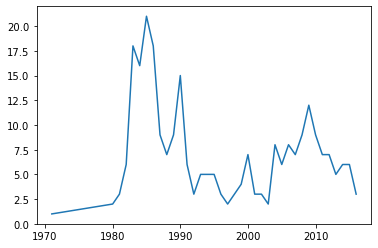

In [17]:
cast[cast.name == 'Mammootty'].year.value_counts().sort_index().plot()

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [18]:
cast[cast.character.str.startswith('Patron in ')].character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in cabaret                3
Patron in restaurant             3
Patron in Restaurant             3
Patron in Club                   3
Patron in booth                  2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [19]:
cast[cast.character.str.startswith('Science')].character.value_counts().head(10)

Science Teacher         57
Science Student          9
Science Fair Student     9
Science Fair Judge       5
Science Promo Cadet      5
Science Reporter         5
Science Club Member      5
Science Kid              5
Science Officer          3
Science Fair Teacher     3
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

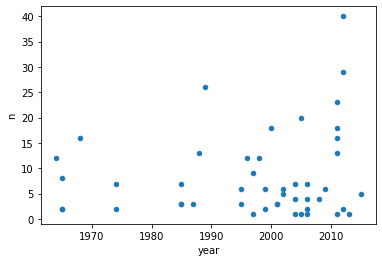

In [20]:
cd3 = cast[cast.name == 'Judi Dench']
cd3[cd3.n.notnull()].plot(x='year', y='n', kind='scatter')

### Plot the n-values of Cary Grant's roles through his career.

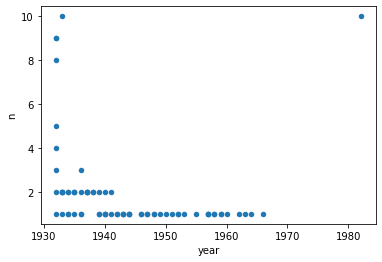

In [21]:
cd4 = cast[cast.name == 'Cary Grant']
cd4[cd4.n.notnull()].plot(x='year', y='n', kind='scatter')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

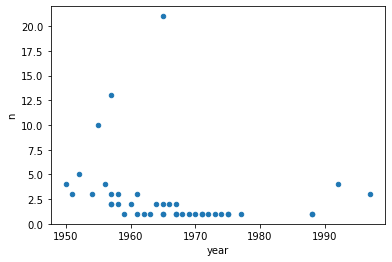

In [22]:
cd5 = cast[cast.name == 'Sidney Poitier']
cd5[cd5.n.notnull()].plot(x='year', y='n', kind='scatter')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [23]:
cd6 = cast[cast.year // 10 == 195]
cd6 = cd6[cd6.n == 1]
cd6.type.value_counts()

actor      6564
actress    2939
Name: type, dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [24]:
cd7 = cast[cast.year // 10 == 195]
cd7 = cd7[cd7.n == 2]
cd7.type.value_counts()

actor      4528
actress    4519
Name: type, dtype: int64